In [ ]:
# @title Linear Discriminant Analysis
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [ ]:
# Define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)

# Evaluate model 1 (Logistic Regression)
model1 = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)

# Evaluate model 2 (Linear Discriminant Analysis)
model2 = LinearDiscriminantAnalysis()
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)

In [ ]:
# Print mean accuracy scores for both models
print("Mean Accuracy of Logistic Regression:", scores1.mean())
print("Mean Accuracy of Linear Discriminant Analysis:", scores2.mean())

Mean Accuracy of Logistic Regression: 0.8916666666666668
Mean Accuracy of Linear Discriminant Analysis: 0.893


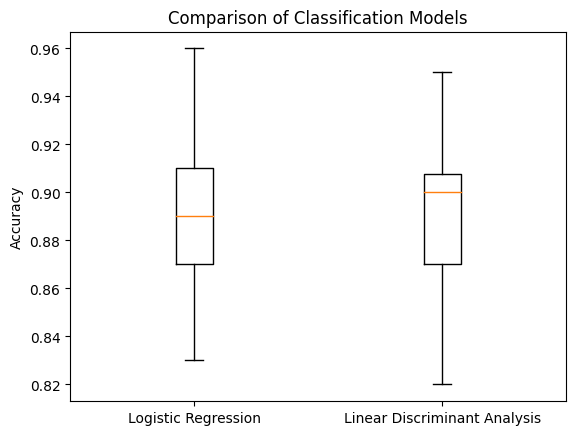

In [ ]:
# Plotting
plt.boxplot([scores1, scores2], labels=['Logistic Regression', 'Linear Discriminant Analysis'])
plt.title('Comparison of Classification Models')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.328, t-Statistic: 1.085


In [ ]:
# interpret the result
if p <= 0.05:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

Algorithms probably have the same performance


In [ ]:
# use 5x2 statistical hypothesis testing procedure to compare two machine learning algorithms
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.evaluate import paired_ttest_5x2cv

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Fit and predict with Logistic Regression model
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Fit and predict with Linear Discriminant Analysis model
model2 = LinearDiscriminantAnalysis()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [ ]:
# Evaluate Logistic Regression model
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f1_score1 = f1_score(y_test, y_pred1)

# Print evaluation metrics
print("Evaluation metrics for Logistic Regression:")
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f1_score1)

Evaluation metrics for Logistic Regression:
Accuracy: 0.89
Precision: 0.8839285714285714
Recall: 0.9166666666666666
F1-score: 0.8999999999999999


In [ ]:
# Evaluate Linear Discriminant Analysis model
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f1_score2 = f1_score(y_test, y_pred2)

print("\nEvaluation metrics for Linear Discriminant Analysis:")
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f1_score2)


Evaluation metrics for Linear Discriminant Analysis:
Accuracy: 0.885
Precision: 0.8632478632478633
Recall: 0.9351851851851852
F1-score: 0.8977777777777779


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

In [ ]:
# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

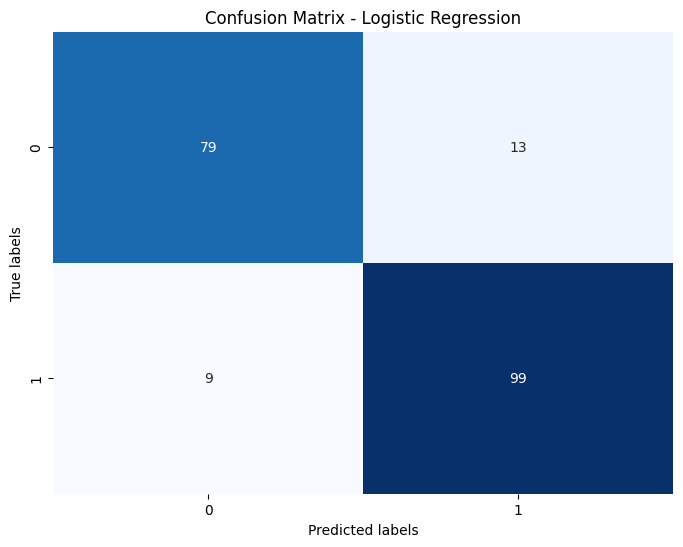

In [ ]:
# Plot confusion matrix for Logistic Regression model
plot_confusion_matrix(y_test, y_pred1, title='Confusion Matrix - Logistic Regression')


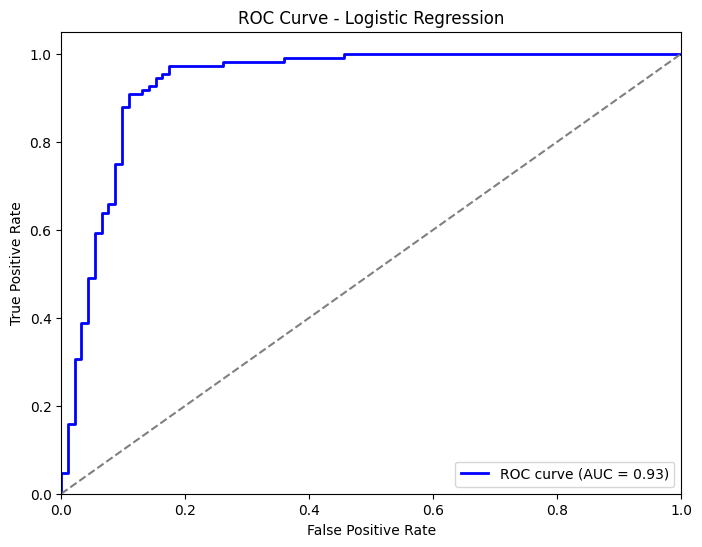

In [ ]:
# Plot ROC curve for Logistic Regression model
y_pred_proba1 = model1.predict_proba(X_test)[:, 1]  # Probability of positive class
plot_roc_curve(y_test, y_pred_proba1, title='ROC Curve - Logistic Regression')

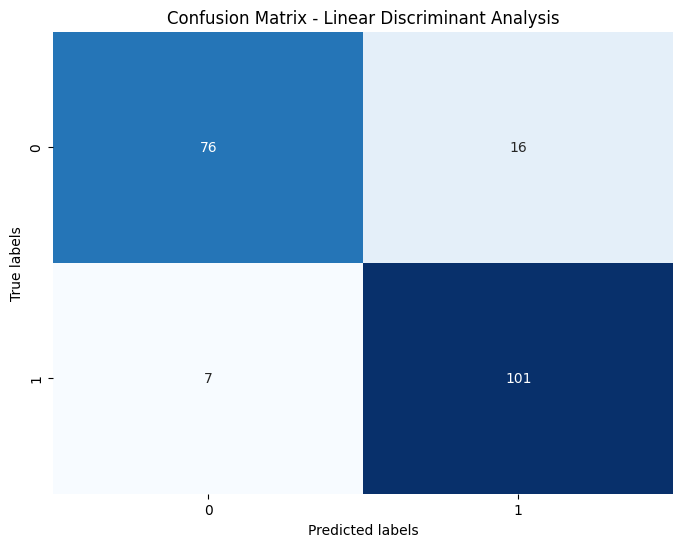

In [ ]:
# Plot confusion matrix for Linear Discriminant Analysis model
plot_confusion_matrix(y_test, y_pred2, title='Confusion Matrix - Linear Discriminant Analysis')

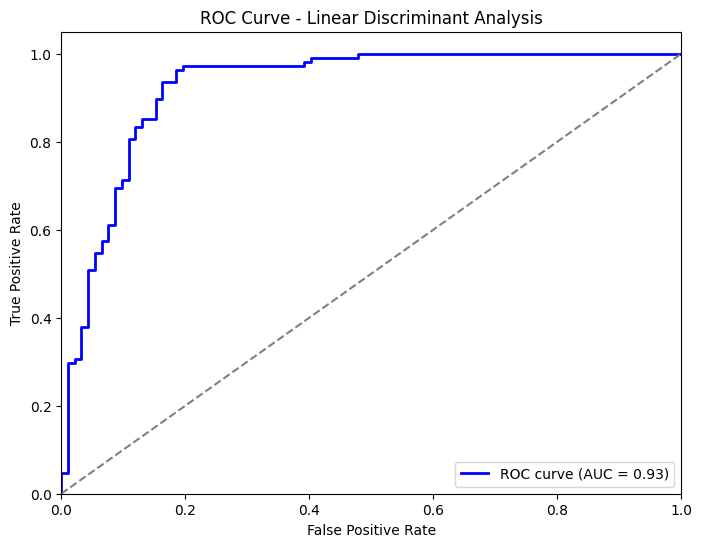

In [ ]:
# Plot ROC curve for Linear Discriminant Analysis model
y_pred_proba2 = model2.predict_proba(X_test)[:, 1]  # Probability of positive class
plot_roc_curve(y_test, y_pred_proba2, title='ROC Curve - Linear Discriminant Analysis')

In [ ]:
# @title Support Vector Machine
from sklearn.svm import SVC

# Define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)

In [ ]:
# Evaluate model 1 (Logistic Regression)
model1 = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)

# Evaluate model 2 (Support Vector Machine)
model2 = SVC()
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)

In [ ]:
# Print mean accuracy scores for both models
print("Mean Accuracy of Logistic Regression:", scores1.mean())
print("Mean Accuracy of Support Vector Machine:", scores2.mean())

Mean Accuracy of Logistic Regression: 0.8916666666666668
Mean Accuracy of Support Vector Machine: 0.951


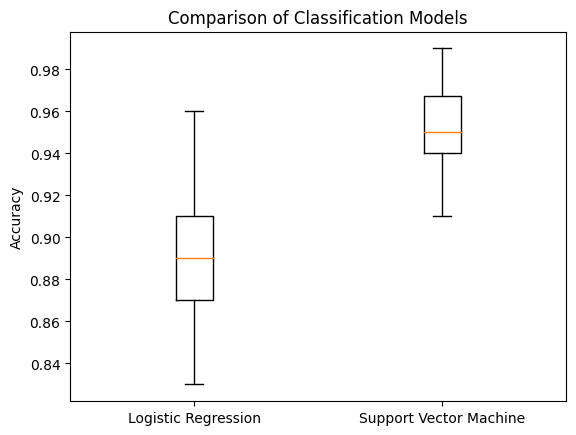

In [ ]:
# Plotting
plt.boxplot([scores1, scores2], labels=['Logistic Regression', 'Support Vector Machine'])
plt.title('Comparison of Classification Models')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=1)

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.003, t-Statistic: -5.318


In [ ]:
# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

Difference between mean performance is probably real


In [ ]:
# Use 5x2 statistical hypothesis testing procedure to compare two machine learning algorithms
from numpy import mean, std

# Evaluate Logistic Regression model
model1 = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=1)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('Logistic Regression Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))

# Evaluate Support Vector Machine model
model2 = SVC()
cv2 = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=1)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)
print('Support Vector Machine Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))


Logistic Regression Mean Accuracy: 0.894 (0.012)
Support Vector Machine Mean Accuracy: 0.945 (0.011)


In [ ]:
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=1)

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.003, t-Statistic: -5.318


In [ ]:
# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

Difference between mean performance is probably real


In [ ]:
# Evaluate models on testing data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Fit and predict with Logistic Regression model
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Fit and predict with Support Vector Machine model
model2 = SVC()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [ ]:
# Evaluate Logistic Regression model
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f1_score1 = f1_score(y_test, y_pred1)

# Print evaluation metrics for Logistic Regression model
print("Evaluation metrics for Logistic Regression:")
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f1_score1)

Evaluation metrics for Logistic Regression:
Accuracy: 0.89
Precision: 0.8839285714285714
Recall: 0.9166666666666666
F1-score: 0.8999999999999999


In [ ]:
# Evaluate Support Vector Machine model
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f1_score2 = f1_score(y_test, y_pred2)

# Print evaluation metrics for Support Vector Machine model
print("\nEvaluation metrics for Support Vector Machine:")
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f1_score2)


Evaluation metrics for Support Vector Machine:
Accuracy: 0.935
Precision: 0.905982905982906
Recall: 0.9814814814814815
F1-score: 0.9422222222222223


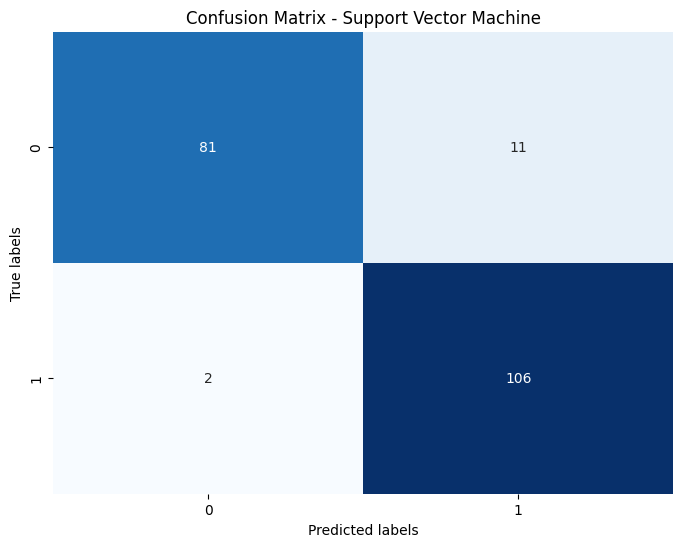

In [ ]:
# Plot confusion matrix for Support Vector Machine model
plot_confusion_matrix(y_test, y_pred2, title='Confusion Matrix - Support Vector Machine')

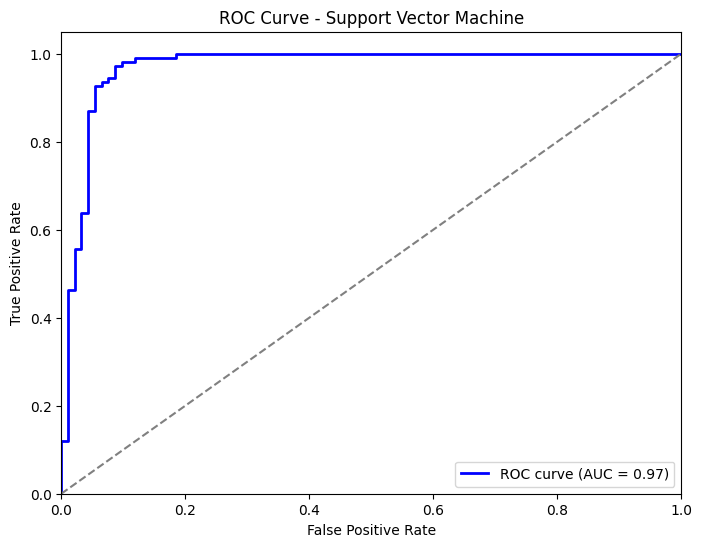

In [ ]:
# Plot ROC curve for Support Vector Machine model
y_pred_proba2 = model2.decision_function(X_test)
plot_roc_curve(y_test, y_pred_proba2, title='ROC Curve - Support Vector Machine')

In [ ]:
# @title Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)

# Evaluate model 1 (Logistic Regression)
model1 = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)

# Evaluate model 2 (Decision Tree Classifier)
model2 = DecisionTreeClassifier()
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)

Mean Accuracy of Logistic Regression: 0.8916666666666668
Mean Accuracy of Decision Tree Classifier: 0.8276666666666667


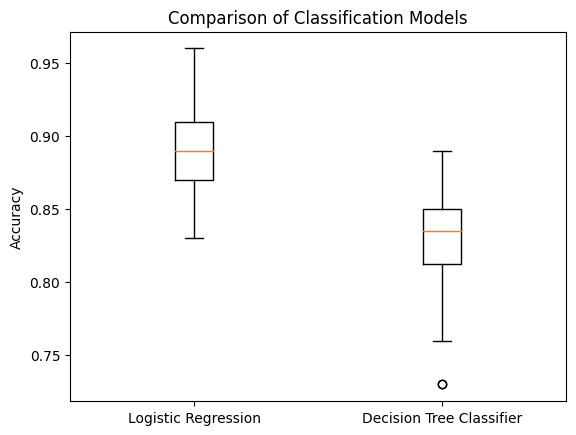

In [ ]:
# Print mean accuracy scores for both models
print("Mean Accuracy of Logistic Regression:", scores1.mean())
print("Mean Accuracy of Decision Tree Classifier:", scores2.mean())

# Plotting
plt.boxplot([scores1, scores2], labels=['Logistic Regression', 'Decision Tree Classifier'])
plt.title('Comparison of Classification Models')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

P-value: 0.005, t-Statistic: 4.720
Difference between mean performance is probably real


In [ ]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# evaluate model 1
model1 = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=1)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('LogisticRegression Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))
# evaluate model 2
model2 = DecisionTreeClassifier()
cv2 = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=1)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)
print('DecisionTreeClassifier Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))

LogisticRegression Mean Accuracy: 0.894 (0.012)
DecisionTreeClassifier Mean Accuracy: 0.819 (0.020)


In [ ]:
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

P-value: 0.006, t-Statistic: 4.609
Difference between mean performance is probably real


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit and predict with Logistic Regression model
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Fit and predict with Decision Tree Classifier model
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [ ]:
# Evaluate Logistic Regression model
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f1_score1 = f1_score(y_test, y_pred1)

# Print evaluation metrics
print("Evaluation metrics for Logistic Regression:")
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f1_score1)

Evaluation metrics for Logistic Regression:
Accuracy: 0.89
Precision: 0.8839285714285714
Recall: 0.9166666666666666
F1-score: 0.8999999999999999


In [ ]:
# Evaluate Decision Tree Classifier model
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test,y_pred2)
recall2 = recall_score(y_test, y_pred2)
f1_score2 = f1_score(y_test, y_pred2)

# Print evaluation metrics for Decision Tree Classifier model
print("\nEvaluation metrics for Decision Tree Classifier:")
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f1_score2)


Evaluation metrics for Decision Tree Classifier:
Accuracy: 0.77
Precision: 0.7767857142857143
Recall: 0.8055555555555556
F1-score: 0.790909090909091


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

In [ ]:
# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

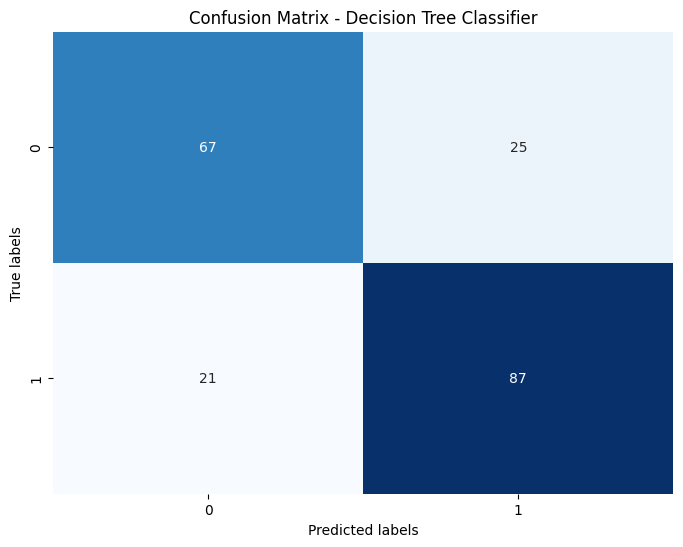

In [ ]:
# Plot confusion matrix for Decision Tree Classifier model
plot_confusion_matrix(y_test, y_pred2, title='Confusion Matrix - Decision Tree Classifier')

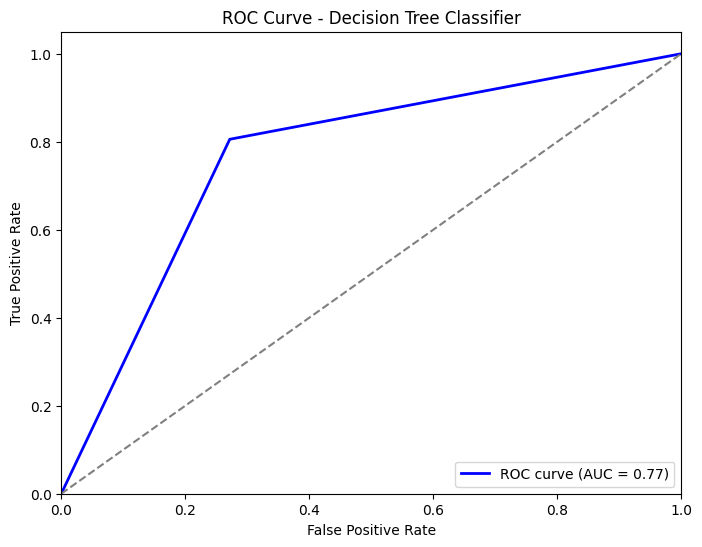

In [ ]:
# Plot ROC curve for Decision Tree Classifier model
y_pred_proba2 = model2.predict_proba(X_test)[:, 1]  # Probability of positive class
plot_roc_curve(y_test, y_pred_proba2, title='ROC Curve - Decision Tree Classifier')

In [ ]:
# @title Random Forest Classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)

# Evaluate model 1 (Logistic Regression)
model1 = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)

# Evaluate model 2 (Random Forest Classifier)
model2 = RandomForestClassifier()
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)

Mean Accuracy of Logistic Regression: 0.8916666666666668
Mean Accuracy of Random Forest Classifier: 0.9170000000000001


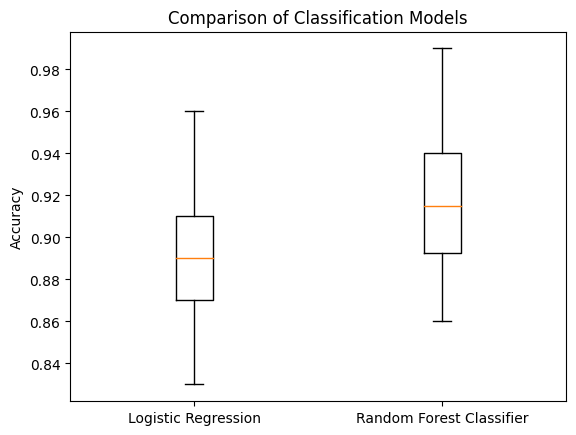

In [ ]:
# Print mean accuracy scores for both models
print("Mean Accuracy of Logistic Regression:", scores1.mean())
print("Mean Accuracy of Random Forest Classifier:", scores2.mean())

# Plotting
plt.boxplot([scores1, scores2], labels=['Logistic Regression', 'Random Forest Classifier'])
plt.title('Comparison of Classification Models')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

P-value: 0.126, t-Statistic: -1.832
Algorithms probably have the same performance


In [ ]:
# use 5x2 statistical hypothesis testing procedure to compare two machine learning algorithms
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.evaluate import paired_ttest_5x2cv

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)

# evaluate model 1
model1 = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=1)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('LogisticRegression Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))

# evaluate model 2
model2 = RandomForestClassifier()
cv2 = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=1)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)
print('RandomForestClassifier Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))

LogisticRegression Mean Accuracy: 0.894 (0.012)
RandomForestClassifier Mean Accuracy: 0.911 (0.013)


In [ ]:
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

P-value: 0.042, t-Statistic: -2.712
Difference between mean performance is probably real


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit and predict with Logistic Regression model
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Fit and predict with Random Forest Classifier model
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [ ]:
# Evaluate Logistic Regression model
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f1_score1 = f1_score(y_test, y_pred1)

# Print evaluation metrics
print("Evaluation metrics for Logistic Regression:")
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f1_score1)

Evaluation metrics for Logistic Regression:
Accuracy: 0.89
Precision: 0.8839285714285714
Recall: 0.9166666666666666
F1-score: 0.8999999999999999


In [ ]:
# Evaluate Random Forest Classifier model
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f1_score2 = f1_score(y_test, y_pred2)

print("\nEvaluation metrics for Random Forest Classifier:")
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f1_score2)


Evaluation metrics for Random Forest Classifier:
Accuracy: 0.87
Precision: 0.8596491228070176
Recall: 0.9074074074074074
F1-score: 0.8828828828828829


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

In [ ]:

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

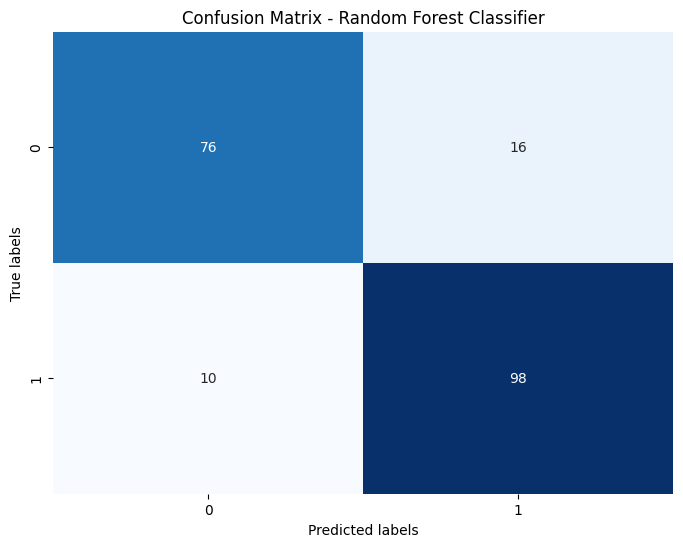

In [ ]:
# Plot confusion matrix for Random Forest Classifier model
plot_confusion_matrix(y_test, y_pred2, title='Confusion Matrix - Random Forest Classifier')

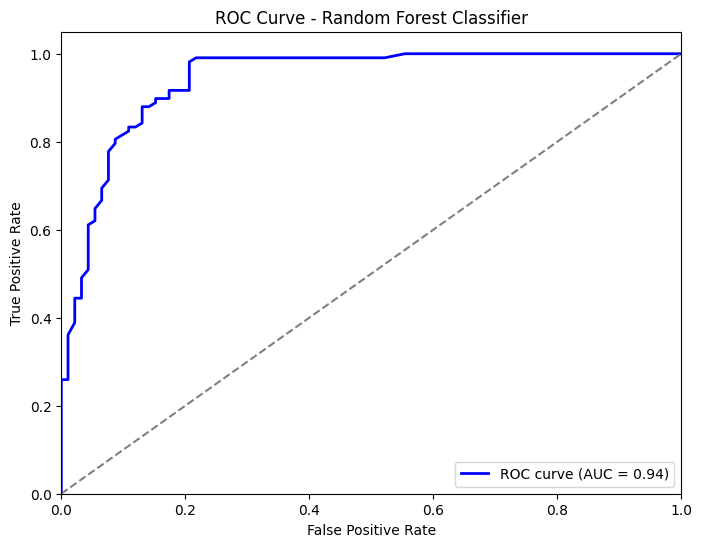

In [ ]:
# Plot ROC curve for Random Forest Classifier model
y_pred_proba2 = model2.predict_proba(X_test)[:, 1]  # Probability of positive class
plot_roc_curve(y_test, y_pred_proba2, title='ROC Curve - Random Forest Classifier')